# Autoencoder for image debluring

This notebook is based on the following work:
- Github: https://github.com/aswintechguy/Deep-Learning-Projects/tree/main/Autoencoder%20-%20Deep%20CNN
- Youtube: https://www.youtube.com/watch?v=En4dZh51Tic

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
from keras.models import load_model

## Load the image number data from the keras datasets

In [25]:
(x_train, _), (x_test, _) = mnist.load_data()

# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [27]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

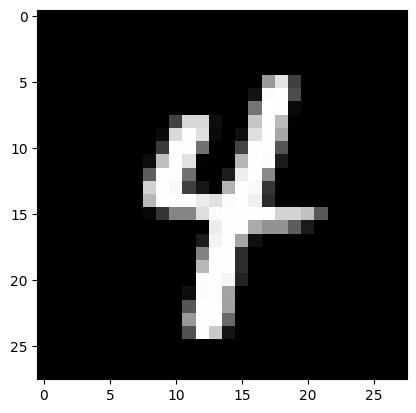

In [28]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Add some noise to the image

In [29]:
# add noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

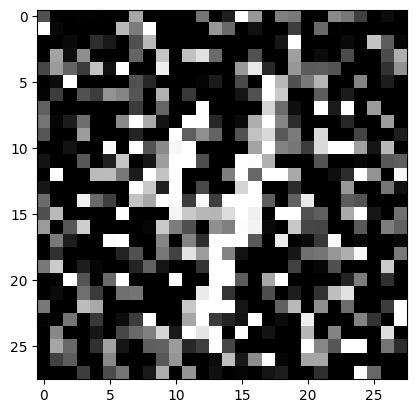

In [31]:
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

## Model creation

In [44]:
# The bellow model was trained on the noisy images and saved in the autoencoder_numbers.keras file
# The training took about 15 minutes on a CPU
model = load_model('./models/autoencoder_numbers.keras')

In [32]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

In [33]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 [==============================] - 39s 163ms/step - loss: 0.2274 - val_loss: 0.1531
Epoch 2/20
235/235 [==============================] - 39s 167ms/step - loss: 0.1456 - val_loss: 0.1386
Epoch 3/20
235/235 [==============================] - 42s 177ms/step - loss: 0.1367 - val_loss: 0.1341
Epoch 4/20
235/235 [==============================] - 42s 177ms/step - loss: 0.1319 - val_loss: 0.1287
Epoch 5/20
235/235 [==============================] - 40s 172ms/step - loss: 0.1288 - val_loss: 0.1261
Epoch 6/20
235/235 [==============================] - 42s 177ms/step - loss: 0.1267 - val_loss: 0.1246
Epoch 7/20
235/235 [==============================] - 43s 185ms/step - loss: 0.1250 - val_loss: 0.1229
Epoch 8/20
235/235 [==============================] - 43s 182ms/step - loss: 0.1237 - val_loss: 0.1217
Epoch 9/20
235/235 [==============================] - 43s 184ms/step - loss: 0.1225 - val_loss: 0.1207
Epoch 10/20
235/235 [==============================] - 44s 186ms/step - l

In [42]:
model.save('./models/autoencoder_numbers.keras')

In [34]:
# predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 2s 6ms/step


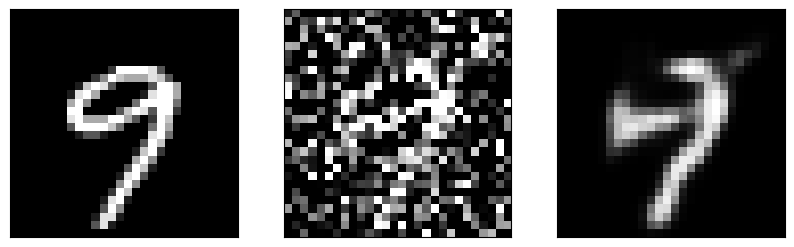

In [48]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 3, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display original image
ax = plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 3, 3)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()